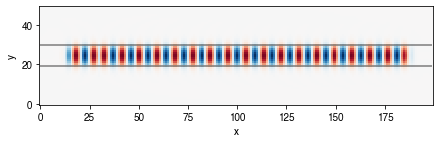

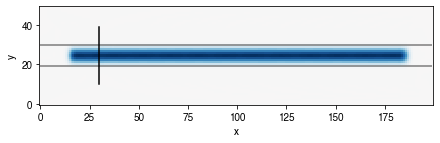

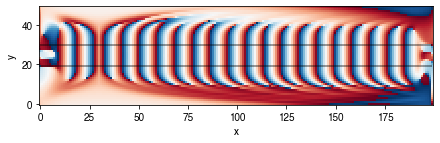

In [4]:
import numpy as np
import matplotlib.pylab as plt

import ceviche
from ceviche import fdfd_ez, fdfd_ez_nl, jacobian
from ceviche.optimizers import adam_optimize
from ceviche.utils import imarr, get_value
from ceviche.modes import insert_mode

omega = 2*np.pi*200e12
dl=50e-9

Nx = 200
Ny = 50
Npml = 20

epsr = np.zeros((Nx, Ny))  
epsr[:,20:30] = 12

src_y = np.arange(10,40)
src_x = 30 * np.ones(src_y.shape, dtype=int)
source = insert_mode(omega, dl, src_x, src_y, epsr)

simulation = fdfd_ez(omega, dl, epsr, [Npml, Npml])
Hx, Hy, Ez = simulation.solve(source)

ceviche.viz.real(Ez, outline=epsr, cbar=False)

Sx = -0.5 * np.real(Ez * np.conj(Hy/1j/omega))
Sy =  0.5 * np.real(Ez * np.conj(Hx/1j/omega))

ax = ceviche.viz.real(Sx, outline=epsr, cbar=False)
ax.plot(src_x,src_y,'k')

ceviche.viz.real(np.angle(Ez), outline=epsr, cbar=False)